In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

np.random.seed(42)

X, y = make_classification(
    n_samples=1000, 
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_clusters_per_class=2,
    flip_y=0.1,
    class_sep=0.8,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## __Random Forest__

In [2]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

start_time = time.time()
rf.fit(X_train, y_train)
rf_time = time.time() - start_time

## __Extra Trees__

In [3]:
et = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

start_time = time.time()
et.fit(X_train, y_train)
et_time = time.time() - start_time

## __Feature Importance__

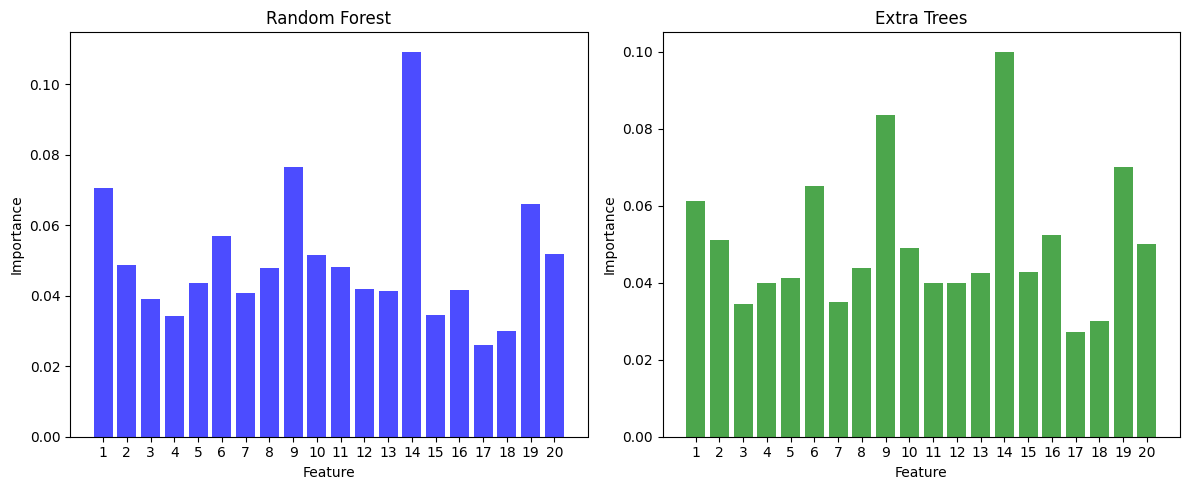

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

rf_importances = rf.feature_importances_
et_importances = et.feature_importances_

features = [str(i+1) for i in range(len(rf_importances))]

axes[0].bar(features, rf_importances, alpha=0.7, color="blue", label="RF")
axes[0].set_title("Random Forest")
axes[0].set_xlabel("Feature")
axes[0].set_ylabel("Importance")

axes[1].bar(features, et_importances, alpha=0.7, color="green", label="ET")
axes[1].set_title("Extra Trees")
axes[1].set_xlabel("Feature")
axes[1].set_ylabel("Importance")

plt.tight_layout()
plt.savefig("./figures/feature_importance.png")
plt.show()

## __Results__

In [5]:
y_pred_rf = rf.predict(X_test)
y_pred_et = et.predict(X_test)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_et = accuracy_score(y_test, y_pred_et)

print("Random Forest")
print("-"*40)
print(f"\t- Accuracy: {accuracy_rf:.4f}\n\t- Training Time: {rf_time:.3f}s")
print("\n\nExtra Trees")
print("-"*40)
print(f"\t- Accurac: {accuracy_et:.4f}\n\t- Training Time: {et_time:.3f}s")

Random Forest
----------------------------------------
	- Accuracy: 0.8233
	- Training Time: 0.414s


Extra Trees
----------------------------------------
	- Accurac: 0.8167
	- Training Time: 0.191s
